# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [3]:
!pip install citipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 675.6/675.6 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675966 sha256=69d971d7f7c7746cdc14f342ae42062f8f140bf703c532da59d06b0a328a5116
  Stored in directory: /root/.cache/pip/wheels/41/82/37/8bb56372b0d828d226b83e0117780ecbe9f409100ac52364bd
Successfully built citipy


In [4]:
!touch  api_keys.py

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 564


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arhribs
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | walvis bay
Processing Record 4 of Set 1 | puerto varas
Processing Record 5 of Set 1 | acapulco de juarez
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | palikir - national government center
Processing Record 9 of Set 1 | dauphin
Processing Record 10 of Set 1 | gamba
Processing Record 11 of Set 1 | mandan
Processing Record 12 of Set 1 | constantia
Processing Record 13 of Set 1 | belzyce
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | turbat
Processing Record 18 of Set 1 | sabha
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | san jose del cabo
Processing Record 21 of Set 1 | thompson
Processing Record 22 of

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          541
Lat           541
Lng           541
Max Temp      541
Humidity      541
Cloudiness    541
Wind Speed    541
Country       541
Date          541
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,arhribs,36.7936,4.3116,11.71,96,100,2.58,DZ,1708136087
1,ancud,-41.8697,-73.8203,12.31,85,0,2.55,CL,1708136087
2,walvis bay,-22.9575,14.5053,13.53,94,7,2.06,NA,1708136087
3,puerto varas,-41.3195,-72.9854,12.81,92,99,2.58,CL,1708136087
4,acapulco de juarez,16.8634,-99.8901,27.90,78,100,5.14,MX,1708135816


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arhribs,36.7936,4.3116,11.71,96,100,2.58,DZ,1708136087
1,ancud,-41.8697,-73.8203,12.31,85,0,2.55,CL,1708136087
2,walvis bay,-22.9575,14.5053,13.53,94,7,2.06,NaN,1708136087
3,puerto varas,-41.3195,-72.9854,12.81,92,99,2.58,CL,1708136087
4,acapulco de juarez,16.8634,-99.8901,27.90,78,100,5.14,MX,1708135816


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

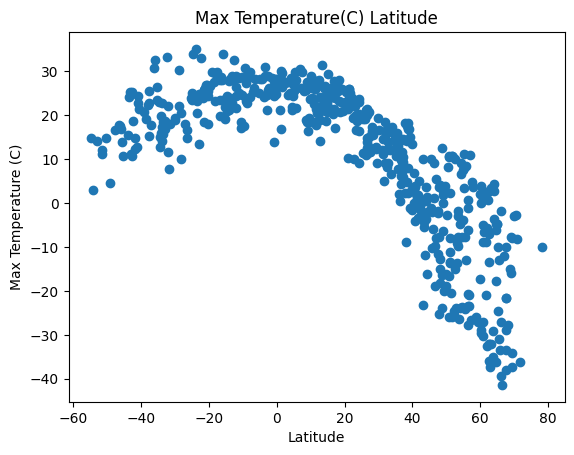

In [15]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("Max Temperature(C) Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

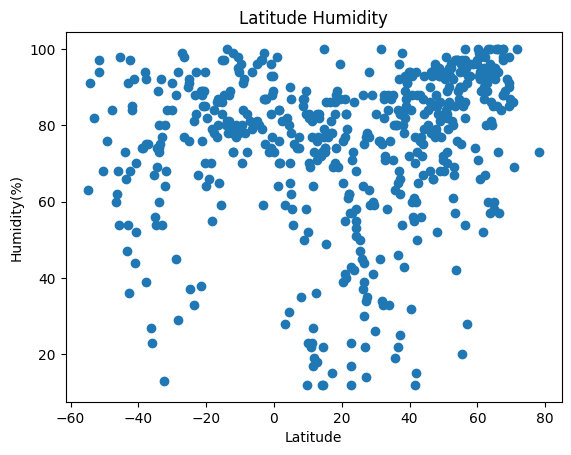

In [17]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])
plt.title("Latitude Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

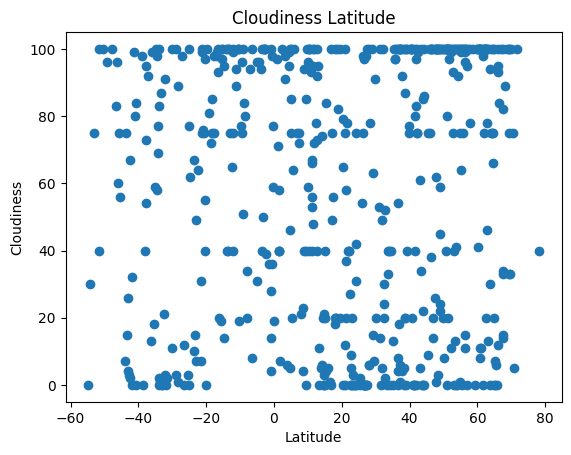

In [18]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])
plt.title("Cloudiness Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

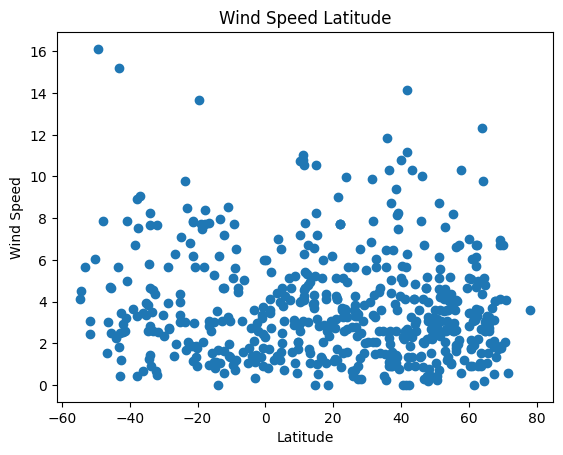

In [22]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])
plt.title("Wind Speed Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >=0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arhribs,36.7936,4.3116,11.71,96,100,2.58,DZ,1708136087
4,acapulco de juarez,16.8634,-99.8901,27.90,78,100,5.14,MX,1708135816
7,palikir - national government center,6.9248,158.1611,30.47,74,75,5.14,FM,1708136087
8,dauphin,51.1494,-100.0502,-7.92,73,0,8.75,CA,1708136087
10,mandan,46.8267,-100.8896,-8.01,66,20,6.69,US,1708136087


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"] >=0)]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arhribs,36.7936,4.3116,11.71,96,100,2.58,DZ,1708136087
4,acapulco de juarez,16.8634,-99.8901,27.90,78,100,5.14,MX,1708135816
7,palikir - national government center,6.9248,158.1611,30.47,74,75,5.14,FM,1708136087
8,dauphin,51.1494,-100.0502,-7.92,73,0,8.75,CA,1708136087
10,mandan,46.8267,-100.8896,-8.01,66,20,6.69,US,1708136087


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7197671221179669


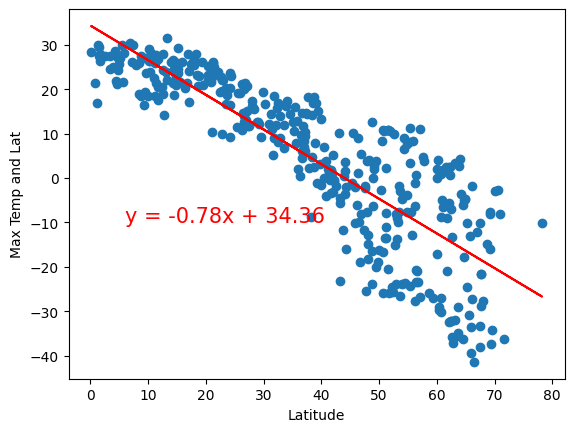

In [30]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp and Lat", (6, -10))

The r-value is: 0.7197671221179669


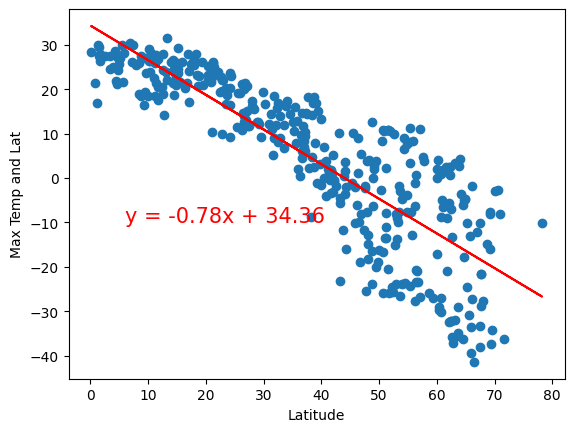

In [31]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp and Lat", (6, -10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.16766326999702894


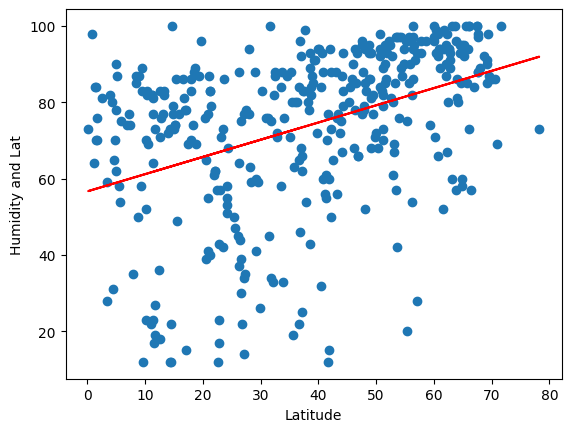

In [32]:
# Northern Hemisphere
# YOUR CODE HERE
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity and Lat", (6, -10))

The r-value is: 0.16766326999702894


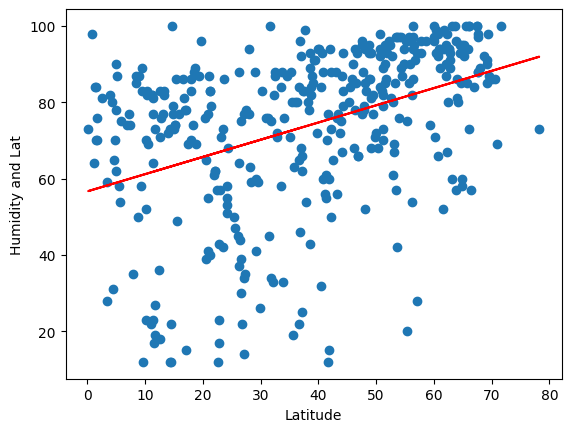

In [34]:
# Southern Hemisphere
# YOUR CODE HERE
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity and Lat", (6, -10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02986479379388911


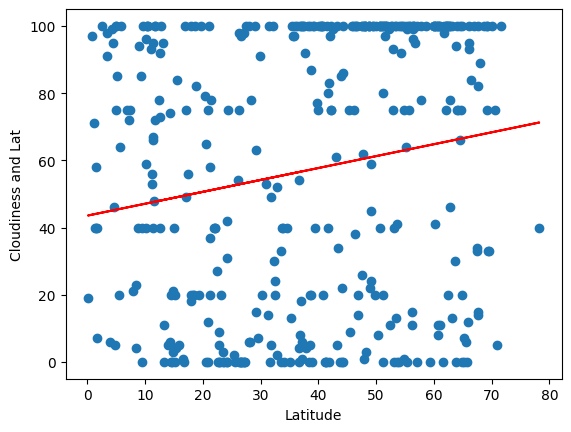

In [35]:
# Northern Hemisphere
# YOUR CODE HERE
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness and Lat", (6, -10))

The r-value is: 0.02986479379388911


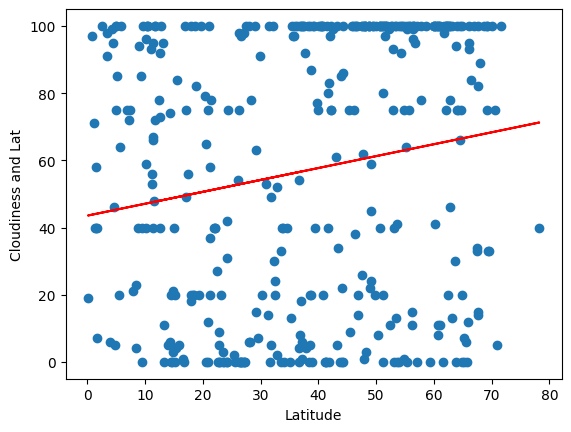

In [37]:
# Southern Hemisphere
# YOUR CODE HERE
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness and Lat", (6, -10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.005839627277800849


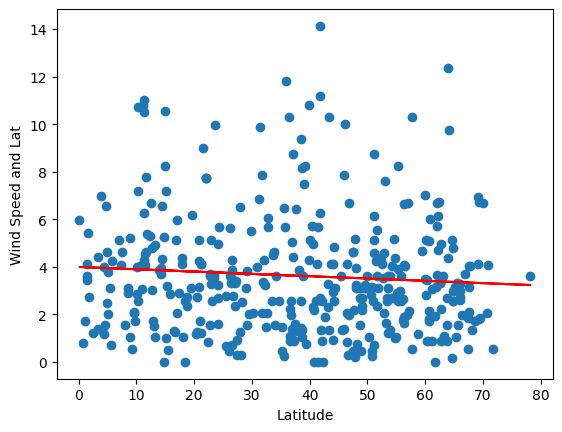

In [38]:
# Northern Hemisphere
# YOUR CODE HERE
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed and Lat", (6, -10))

The r-value is: 0.005839627277800849


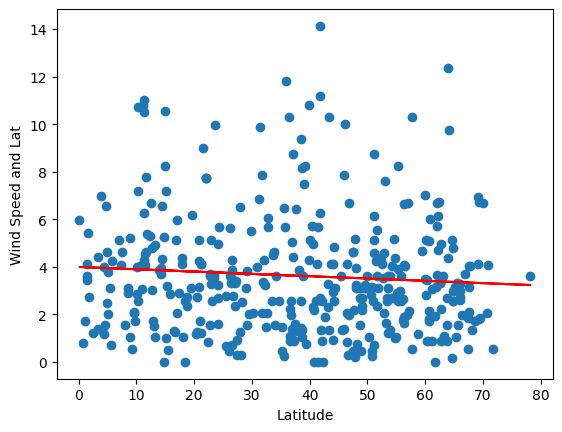

In [39]:
# Southern Hemisphere
# YOUR CODE HERE
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed and Lat", (6, -10))

**Discussion about the linear relationship:** YOUR RESPONSE HERE